In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
import scienceplots

In [61]:
@njit()
def algo1(tunnel_rates, random_number1):

    k_tot       = np.sum(tunnel_rates)
    event       = random_number1 * k_tot
    min_val     = 0.0
    max_val     = 0.0

    for jump, t_rate in enumerate(tunnel_rates):

        if (t_rate != 0.0):

            max_val = min_val + t_rate

            if ((event > min_val) and (event <= max_val)):
                
                break

            min_val = max_val

@njit()
def algo2(tunnel_rates, random_number1):

    kmc_cum_sum = np.cumsum(tunnel_rates)
    k_tot       = kmc_cum_sum[-1]
    event       = random_number1 * k_tot

    # Select next Jump
    jump    = np.searchsorted(a=kmc_cum_sum, v=event)   

In [62]:
ip = []
r1 = []
r1s = []
r2 = []
r2s = []

for i in range(1,101):

    t_algo1 = []
    t_algo2 = []
    N       = 1000*i
    ip.append(N)

    for i in range(50): 

        tunnel_rates    = np.random.rand(N)
        random_number   = np.random.rand()

        t1 = time.process_time_ns()
        algo1(tunnel_rates, random_number)
        t2 = time.process_time_ns()
        t_algo1.append(t2-t1)

        t1 = time.process_time_ns()
        algo2(tunnel_rates, random_number)
        t2 = time.process_time_ns()
        t_algo2.append(t2-t1)

    r1.append(np.mean(t_algo1)/1000)
    r1s.append(np.std(t_algo1)/1000)
    r2.append(np.mean(t_algo2)/1000)
    r2s.append(np.std(t_algo2)/1000)

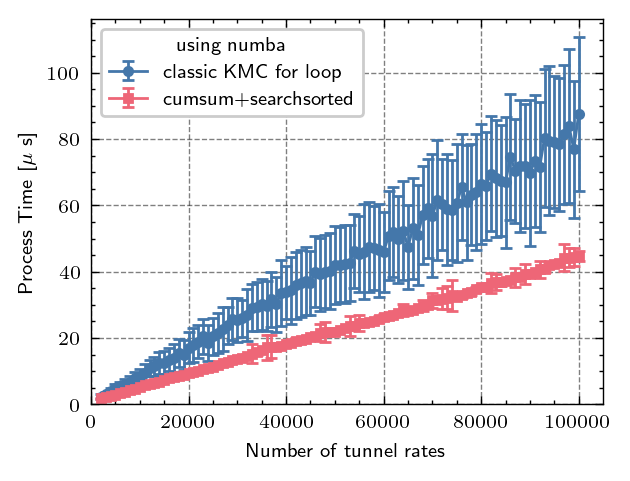

In [63]:
with plt.style.context(["science", "nature", "bright", "grid"]):
    plt.figure(dpi=200)
    plt.errorbar(ip[1:], r1[1:], r1s[1:], fmt='o-', capsize=2, label='classic KMC for loop')
    plt.errorbar(ip[1:], r2[1:], r2s[1:], fmt='s-', capsize=2, label='cumsum+searchsorted')
    plt.xlabel("Number of tunnel rates")
    plt.ylabel("Process Time [$\mu$ s]")
    plt.legend(title='using numba')
    plt.xlim(0)
    plt.ylim(0)
    plt.savefig("/home/jonas/phd/plots/misc/KMC_Algo_Runtime_numba.svg", bbox_inches='tight', transparent=True)
    plt.savefig("/home/jonas/phd/plots/misc/KMC_Algo_Runtime_numba.pdf", bbox_inches='tight', transparent=False)

In [34]:
print(f"ALGO1 = {np.mean(t_algo1)}; ALGO2 = {np.mean(t_algo2)}")

ALGO1 = 0.51172532665; ALGO2 = 0.02717995015000003


In [64]:
df = pd.DataFrame()
for i in range(10):
    df[i]   = pd.read_csv(f"test/times_e_0.05_{i}.csv", header=None)
sums1 = df.sum(axis=1).values

df = pd.DataFrame()
for i in range(10):
    df[i]   = pd.read_csv(f"test2/times_e_0.05_{i}.csv", header=None)
sums2 = df.sum(axis=1).values


df = pd.DataFrame()
for i in range(10):
    df[i]   = pd.read_csv(f"test3/times_e_0.05_{i}.csv", header=None)
sums3 = df.sum(axis=1).values

In [65]:
eq_vs_j = []
volts = []
for N in range(3,10):
    dff = pd.read_csv(f"test/Nx={N}_Ny={N}_Nz=1_Ne=4.csv")
    dff = dff[(dff['Jumps'] < 10000000) & (dff['Jumps'] > 1000)]
    Nvs = len(dff)
    volts.append(Nvs)
volts1 = np.array(volts)

volts = []
for N in range(3,10):
    dff = pd.read_csv(f"test2/Nx={N}_Ny={N}_Nz=1_Ne=4.csv")
    dff = dff[(dff['Jumps'] < 10000000) & (dff['Jumps'] > 1000)]
    Nvs = len(dff)
    volts.append(Nvs)
volts2 = np.array(volts)

volts = []
for N in range(3,10):
    dff = pd.read_csv(f"test3/Nx={N}_Ny={N}_Nz=1_Ne=4.csv")
    dff = dff[(dff['Jumps'] < 10000000) & (dff['Jumps'] > 1000)]
    Nvs = len(dff)
    volts.append(Nvs)
volts3 = np.array(volts)

In [66]:
means1 = 10**(-9)*sums1/volts1
means2 = 10**(-9)*sums2/volts2
means3 = 10**(-9)*sums3/volts3

In [67]:
def get_njunctions(N):

    return 4*N*(N-1)

xvals = np.array([i for i in range(3,10)])
xvals = get_njunctions(xvals)

<ErrorbarContainer object of 3 artists>

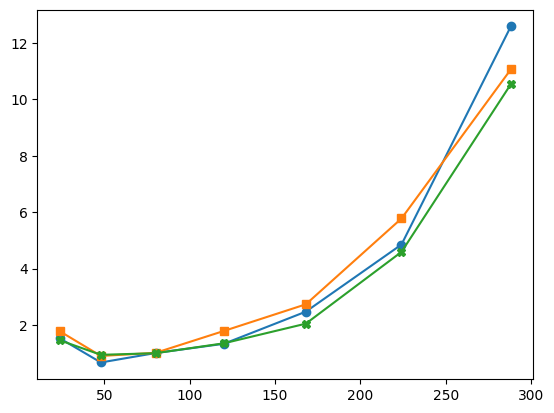

In [68]:
plt.errorbar(x=xvals, y=means1, yerr=0, fmt='o-')
plt.errorbar(x=xvals, y=means2, yerr=0, fmt='s-', label='')
plt.errorbar(x=xvals, y=means3, yerr=0, fmt='X-', label='')

In [1]:
np.random.randint(0,10, size=(5,5))

NameError: name 'np' is not defined

In [8]:
N       = 7
file    = f"../Nx={N}_Ny={N}_Nz=1_Ne=4.csv"
df      = pd.read_csv(file)
df      = df[df['Jumps'] > 1000].reset_index(drop=True)
(df['Eq_Jumps']/df['Jumps']).describe()

count    175.000000
mean       0.099263
std        0.095784
min        0.001570
25%        0.039618
50%        0.074755
75%        0.123359
max        0.705826
dtype: float64